In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [56]:
data = pd.read_csv('/content/data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [57]:
data.drop(columns= ['Unnamed: 32', 'id'], inplace= True)

In [7]:
data.shape

(569, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
data.duplicated().sum()

0

Get line base accuracy and find the important features

In [58]:
X = data.drop(columns= 'diagnosis')
y = data['diagnosis']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
clf = DecisionTreeClassifier(max_depth = 5, min_samples_split = 6, random_state= 40)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=6, random_state=40)

In [63]:
accuracy_score(y_train, clf.predict(X_train))

0.9953051643192489

In [64]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9300699300699301

In [65]:
importance = clf.feature_importances_

In [66]:
importance = list(zip(importance, X_train.columns))
importance.sort(key= lambda x: x[0], reverse= True)
importance, cols = zip(*importance)

In [67]:
importance = list(importance)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


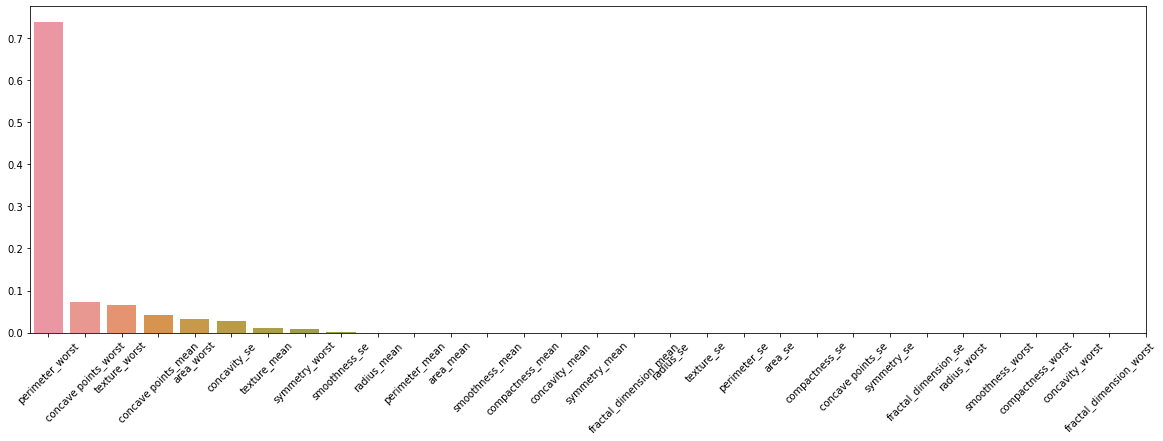

In [68]:
# plot feature importance
plt.figure(figsize= (20, 6))
sns.barplot([x for x in range(len(importance))], importance)
plt.xticks(np.arange(31), cols, rotation = 45)
plt.show()

In [20]:
most_important = list(cols[:8])
most_important

['perimeter_worst',
 'concave points_worst',
 'concavity_worst',
 'area_worst',
 'texture_worst',
 'area_mean',
 'area_se',
 'concave points_mean']

In [69]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [70]:
data['diagnosis'] = data['diagnosis'].replace(['M', 'B'], [0, 1])

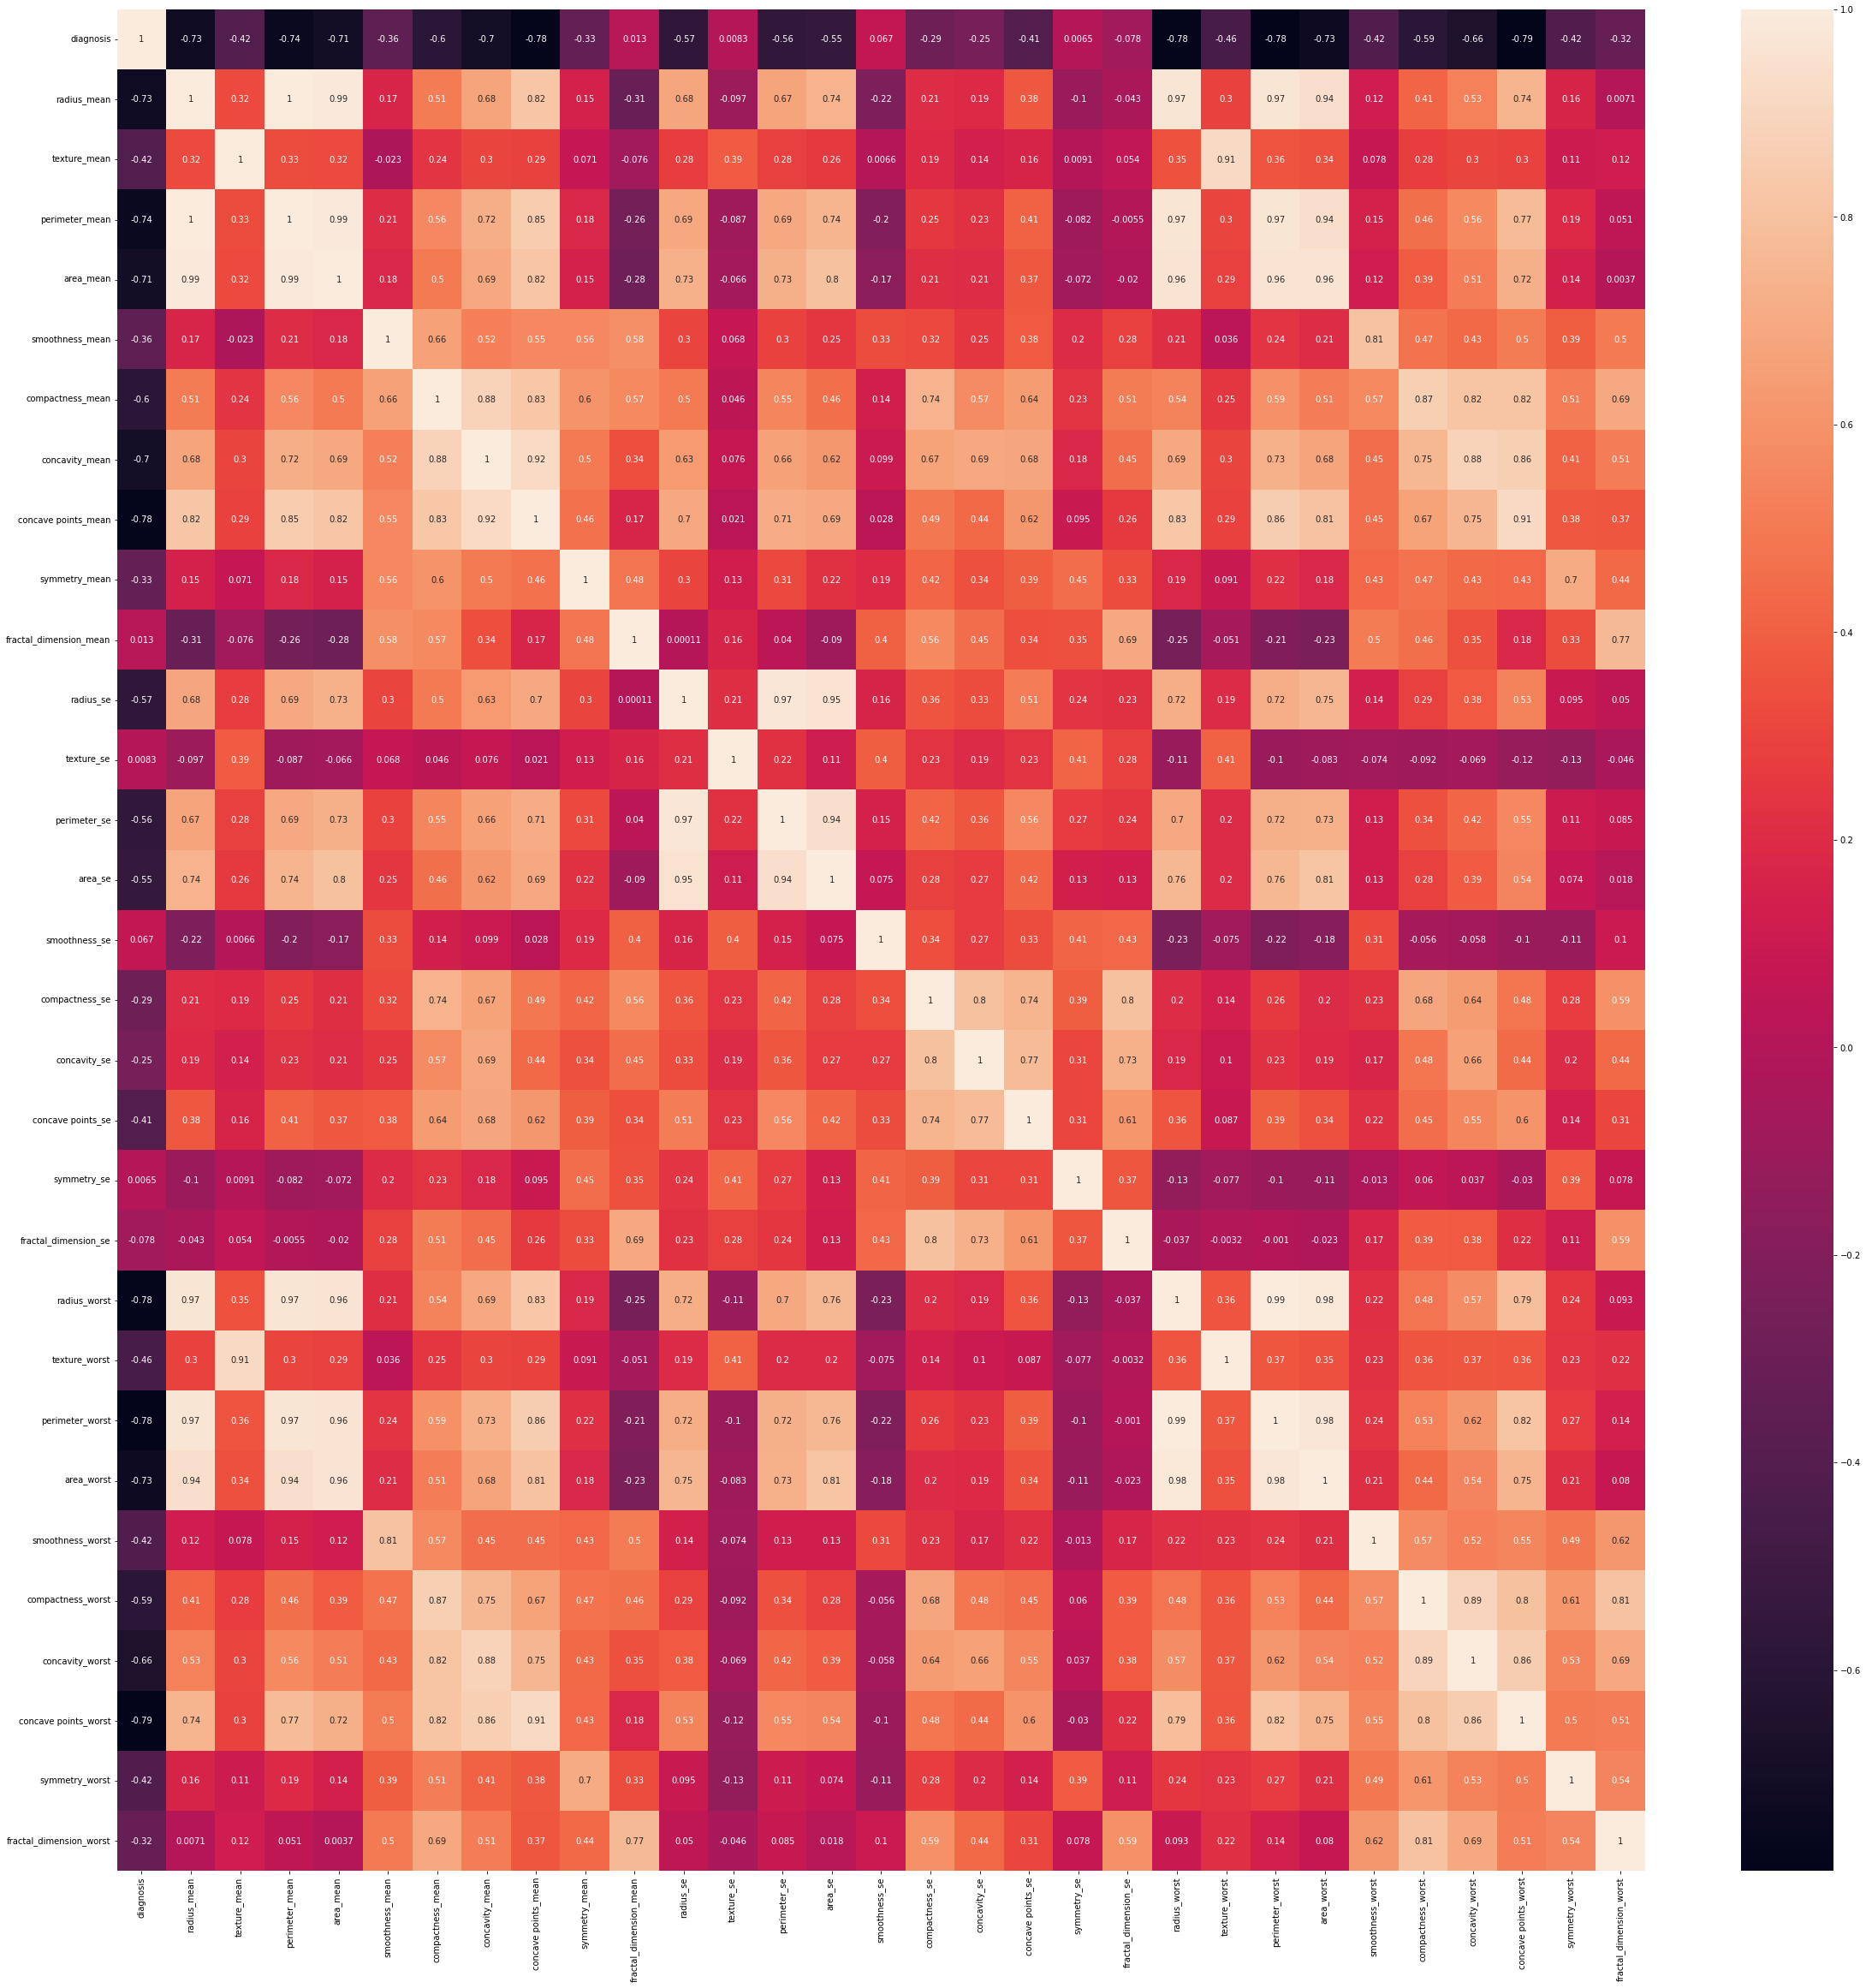

In [ ]:
plt.figure(figsize=(40, 40))
corr = corr = data.corr()
sns.heatmap(corr, annot= True)

In [ ]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [71]:
data['radius_perimeter_area'] = data[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst']].sum(axis = 1)
data['texture_mean'] = data[['texture_mean', 'texture_worst']].sum(axis = 1)
data['compactness_concave'] = data[['compactness_mean', 'concavity_mean', 'concave points_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst']].sum(axis = 1)
data['radius_perimeter_area_se'] = data[['radius_se', 'perimeter_se', 'area_se']].sum(axis = 1)
data['compactness_concave_se'] = data[['compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se']].sum(axis = 1)
data['smoothness'] = data[['smoothness_worst', 'smoothness_mean']].sum(axis = 1)

data.drop(columns= ['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_mean', 'texture_worst', 
                    'compactness_mean', 'concavity_mean', 'concave points_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                    'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se',
                    'smoothness_worst', 'smoothness_mean'], inplace = True)

In [72]:
data.head()

,diagnosis,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst,fractal_dimension_worst,radius_perimeter_area,compactness_concave,radius_perimeter_area_se,compactness_concave_se,smoothness
0,0,0.2419,0.07871,0.9053,0.006399,0.03003,0.4601,0.11890,3370.77,2.36770,163.0840,0.124833,0.28060
1,0,0.1812,0.05667,0.7339,0.005225,0.01389,0.2750,0.08902,3619.26,0.84991,78.0215,0.048612,0.20854
2,0,0.2069,0.05999,0.7869,0.006150,0.02250,0.3613,0.08758,3237.76,1.60310,99.3606,0.103531,0.25400
3,0,0.2597,0.09744,1.1560,0.009110,0.05963,0.6638,0.17300,1156.58,2.44120,31.1706,0.159068,0.35230
4,0,0.1809,0.05883,0.7813,0.011490,0.01756,0.2364,0.07678,3202.13,1.20260,100.6352,0.105455,0.23770


In [73]:
data.shape

(569, 13)

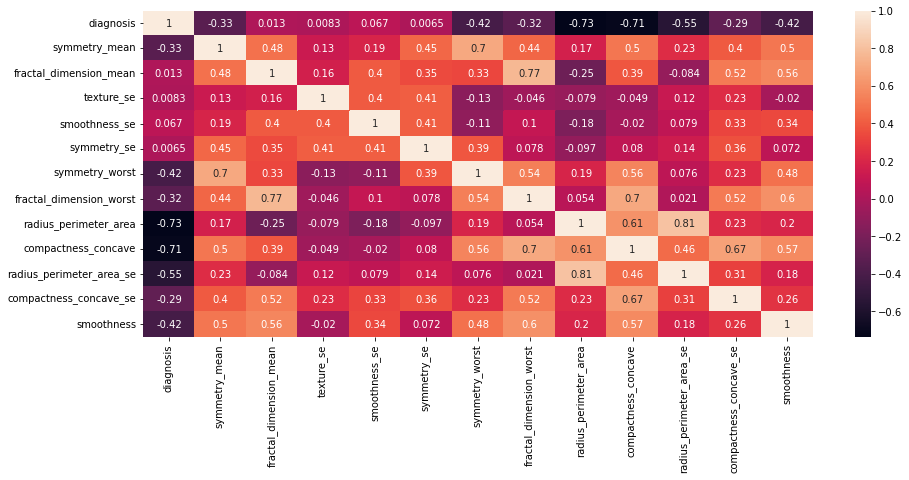

In [53]:
plt.figure(figsize=(15, 6))
corr = corr = data.corr()
sns.heatmap(corr, annot= True)

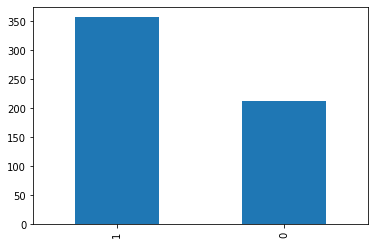

In [48]:
data['diagnosis'].value_counts().plot(kind='bar')

In [253]:
X = data.drop(columns= 'diagnosis')
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, random_state= 40)
clf = DecisionTreeClassifier(max_depth = 5, min_samples_split = 6, random_state= 40)
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9835680751173709
0.9300699300699301


In [ ]:
columns = X_res.columns
plt.figure(figsize= (10,10))
for i in range (len(columns)):
  plt.subplot(5,3,i+1)
  plt.yticks([])
  sns.distplot(data[columns[i]])
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

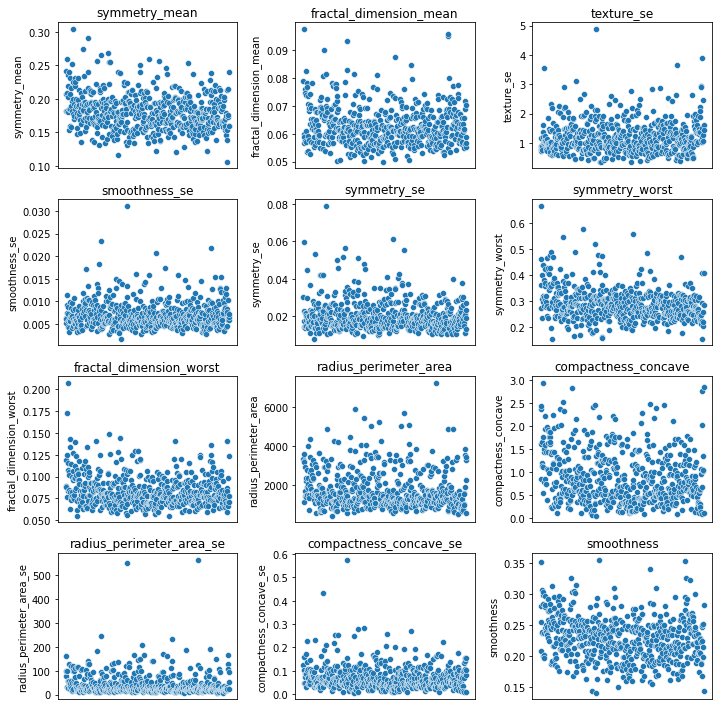

In [196]:
columns = X.columns
plt.figure(figsize= (10,10))
for i in range (len(columns)):
  plt.subplot(4,3,i+1)
  # plt.yticks([])
  plt.xticks([])
  plt.title(columns[i])
  sns.scatterplot(np.arange(X.shape[0]), X[columns[i]])
plt.tight_layout()

In [264]:
def Handle_outliers_iqr(data):
    outliers = []
    for col in data.columns:
      q1 = np.percentile(X[col], 25)
      q3 = np.percentile(X[col], 75)
      # print(q1, q3)
      IQR = q3-q1
      lwr_bound = q1-(1.5*IQR)
      upr_bound = q3+(1.5*IQR)
      # print(lwr_bound, upr_bound)
      upper = X[col][X[col] > upr_bound]
      lower = X[col][X[col] > upr_bound]

      X[col][X[col] > upr_bound] = upr_bound
      X[col][X[col] > upr_bound] = lwr_bound

In [265]:
Handle_outliers_iqr(X)

In [199]:
X

,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst,fractal_dimension_worst,radius_perimeter_area,compactness_concave,radius_perimeter_area_se,compactness_concave_se,smoothness
0,0.2419,0.07871,0.90530,0.006399,0.03003,0.41915,0.11890,3370.770,2.32445,92.4571,0.124833,0.28060
1,0.1812,0.05667,0.73390,0.005225,0.01389,0.27500,0.08902,3580.175,0.84991,78.0215,0.048612,0.20854
2,0.2069,0.05999,0.78690,0.006150,0.02250,0.36130,0.08758,3237.760,1.60310,92.4571,0.103531,0.25400
3,0.2464,0.07875,1.15600,0.009110,0.03596,0.41915,0.12301,1156.580,2.32445,31.1706,0.159068,0.31863
4,0.1809,0.05883,0.78130,0.011490,0.01756,0.23640,0.07678,3202.130,1.20260,92.4571,0.105455,0.23770
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.1726,0.05623,1.25600,0.010300,0.01114,0.20600,0.07115,3580.175,1.34230,92.4571,0.109669,0.25200
565,0.1752,0.05533,2.43415,0.005769,0.01898,0.25720,0.06637,3322.020,1.02181,92.4571,0.083008,0.21440
566,0.1590,0.05648,1.07500,0.005903,0.01318,0.22180,0.07820,2252.680,1.03933,52.4314,0.104072,0.19845
567,0.2397,0.07016,1.59500,0.006522,0.02324,0.40870,0.12301,3457.040,2.32445,92.4571,0.155575,0.28280


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

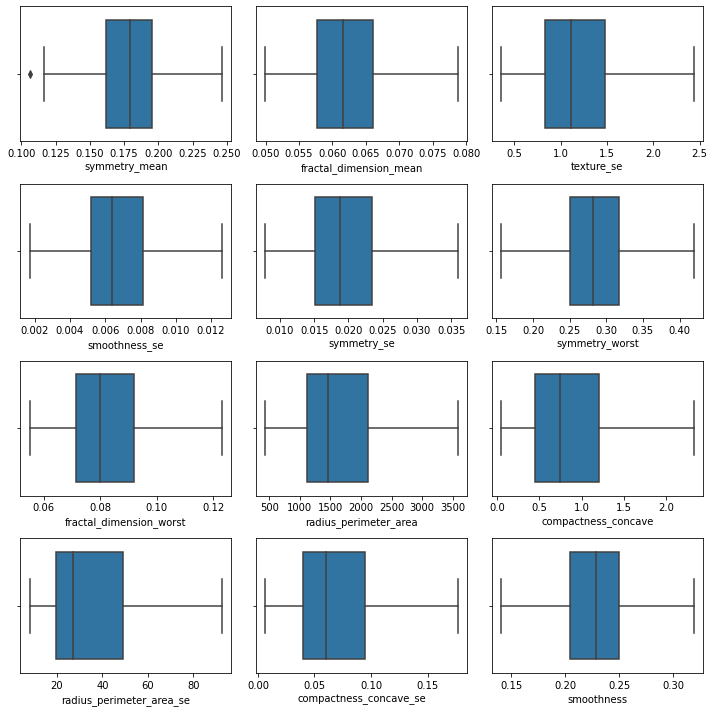

In [200]:
columns = X.columns
plt.figure(figsize= (10,10))
for i in range (len(columns)):
  plt.subplot(4,3,i+1)
  plt.yticks([])
  sns.boxplot(X[columns[i]])
plt.tight_layout()

In [272]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

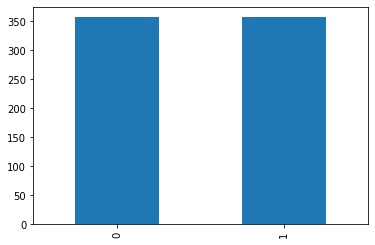

In [215]:
y_res.value_counts().plot(kind = 'bar')

In [225]:
from sklearn.preprocessing import StandardScaler

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, stratify= y_res, random_state= 40)

In [275]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [326]:
clf = DecisionTreeClassifier(max_depth = 5, min_samples_split = 6, random_state= 40)
clf.fit(X_train, y_train)
print(accuracy_score(y_train, clf.predict(X_train)))
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9869158878504672
0.9385474860335196


## explore the most important parameters of Decision tree model and how they impact our model in term of over-fitting and under-fitting.

In [290]:
y_pred = clf.predict(X_test)

In [291]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9383270911360799

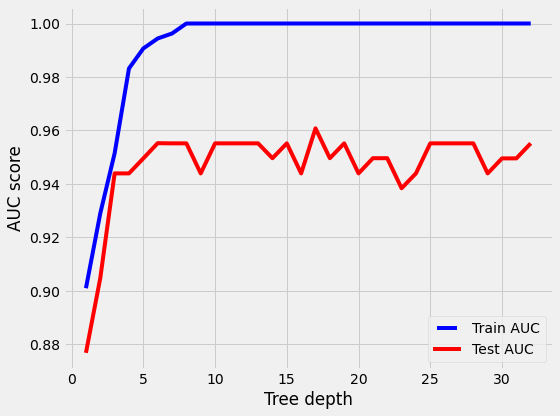

In [305]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize= (8, 6))
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.style.use('fivethirtyeight')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.tight_layout()


In [316]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

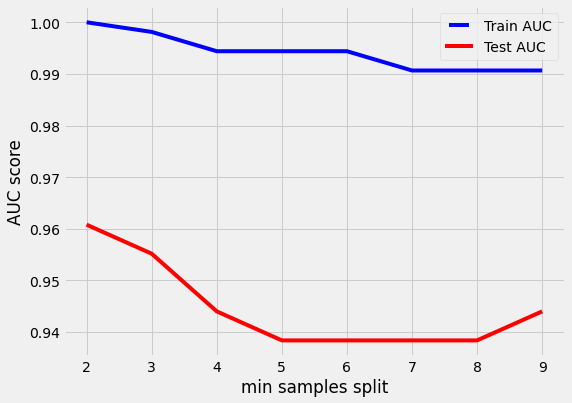

In [319]:
min_samples_splits = np.arange(2, 10)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
plt.figure(figsize= (8, 6))
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [320]:
np.linspace(0.1, 0.5, 5, endpoint=True)

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [321]:
x_train = X_train
x_test = X_test

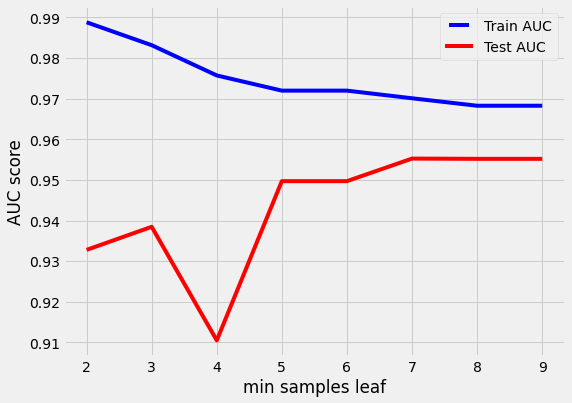

In [323]:
min_samples_leafs = np.arange(2, 10)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
plt.figure(figsize= (8, 6))
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

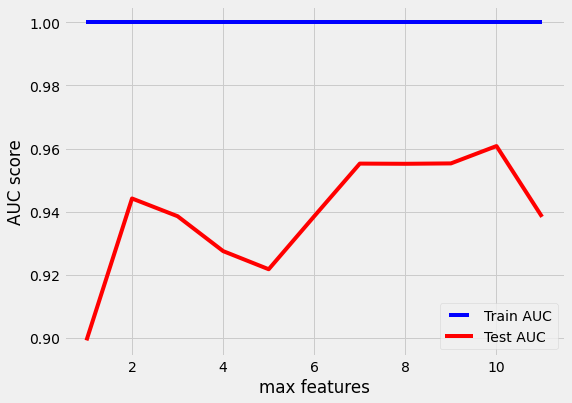

In [325]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
plt.figure(figsize= (8, 6))
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

## Implementation: Model Tuning

In [327]:
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
optimclf = DecisionTreeClassifier()

# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {"max_depth" : [7, 10], "max_features" : [8, 10], "min_samples_split" : [6, 8, 10]}

scorer = make_scorer(f1_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = optimclf, param_grid = parameters,scoring = scorer , cv = 5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = clf.predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions)))
print("The parameters of best model is : \n", grid_fit.best_estimator_)

Unoptimized model
------
Accuracy score on testing data: 0.9385
F-score on testing data: 0.9357

Optimized Model
------
Final accuracy score on the testing data: 0.9721
Final F-score on the testing data: 0.9721
The parameters of best model is : 
 DecisionTreeClassifier(max_depth=7, max_features=10, min_samples_split=6)
